In [8]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Load processed dataframe
df = pd.read_csv('csv/metadata_text_merged_cleaned.csv')

# Word2vec

In [11]:
# Train word2vec model to produce word embeddings based on our corpus

# define training data
sentences = [letter.lower().split() for letter in df['text_cleaned_dealiased'].tolist()]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# save model
model.save('word2vec/w2v.bin')

Word2Vec(vocab=16223, size=100, alpha=0.025)


In [ ]:
# new_model = Word2Vec.load('word2vec/w2v.bin')

In [12]:
def w2v_to_tsv(model, tensorsfp='word2vec/tensors.tsv', metadatafp='word2vec/metadata.tsv'):
    '''Given a w2v model, convert to tsv for display using Google's embedding projector'''
    with open(tensorsfp, 'w+') as tensors:
        with open(metadatafp, 'w+') as metadata:
            for word in model.wv.index2word:
                encoded = word.encode('utf-8')
                metadata.write(encoded + '\n')
                vector_row = '\t'.join(map(str, model[word]))
                tensors.write(vector_row + '\n')

In [13]:
w2v_to_tsv(model)

/Users/harryxue/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [14]:
# Get closest words in vector space to pyrate
model.wv.most_similar('pirate')

[('axim', 0.9979602694511414),
 ('butterue', 0.9974510073661804),
 ('understood', 0.99712735414505),
 ('engaged', 0.9959442019462585),
 ('turned', 0.9959254860877991),
 ('affter', 0.9958546757698059),
 ('hired', 0.9951235055923462),
 ('princes', 0.9949150085449219),
 ('passing', 0.9948322176933289),
 ('ie', 0.9943596124649048)]

In [15]:
# Get list of words that appear more than 100 times so we can narrow down the number of terms
more_than_100 = list(freq[freq > 100].index)

def pca_plot(model, subset=more_than_100):
    "Creates PCA dimensionality reduction of Word2vec model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        if word in subset:
            tokens.append(model[word])
            labels.append(word)
    
    pca_model = PCA(n_components=2)
    new_values = pca_model.fit_transform(tokens)
    
    # Print percent variance explained
    print pca_model.explained_variance_ratio_

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(32, 32)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/harryxue/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


[0.34943144 0.1916447 ]


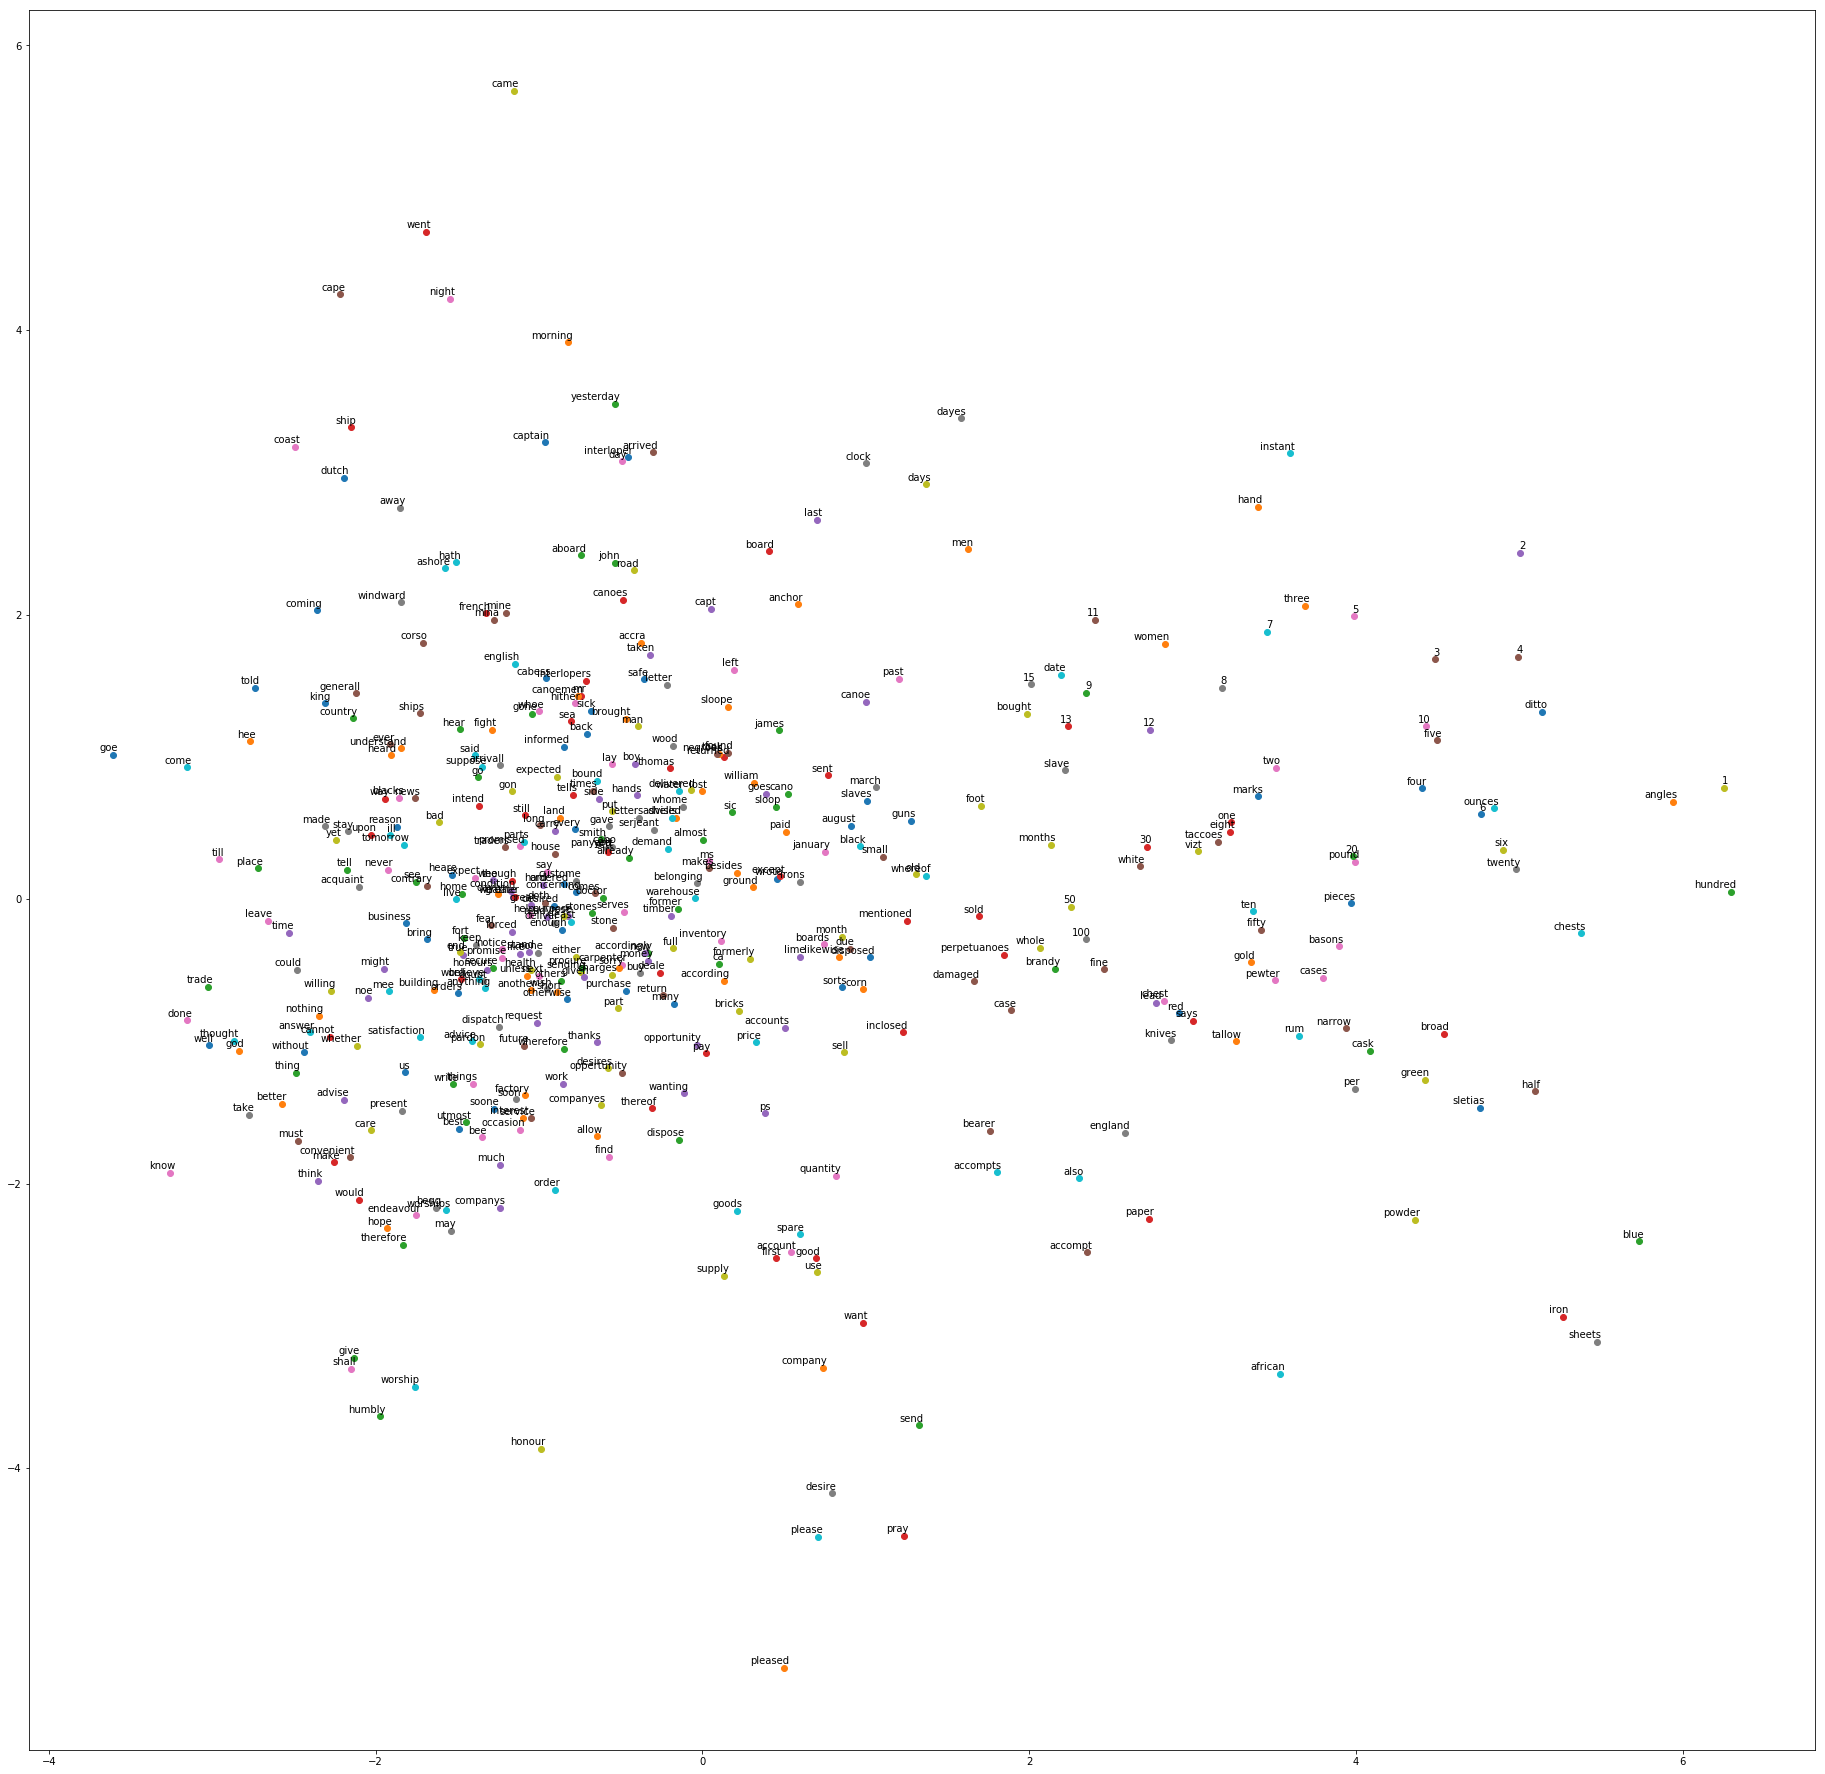

In [16]:
pca_plot(model)